In [1]:
import cv2

In [2]:
from google.colab.patches import cv2_imshow

# Testing on single image.

In [3]:
#import drive to import data from
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#create a first image to test
test_image = cv2.imread('/content/drive/MyDrive/tracking-data/00001.jpg',1)

In [4]:
test_image.shape

(720, 1280, 3)

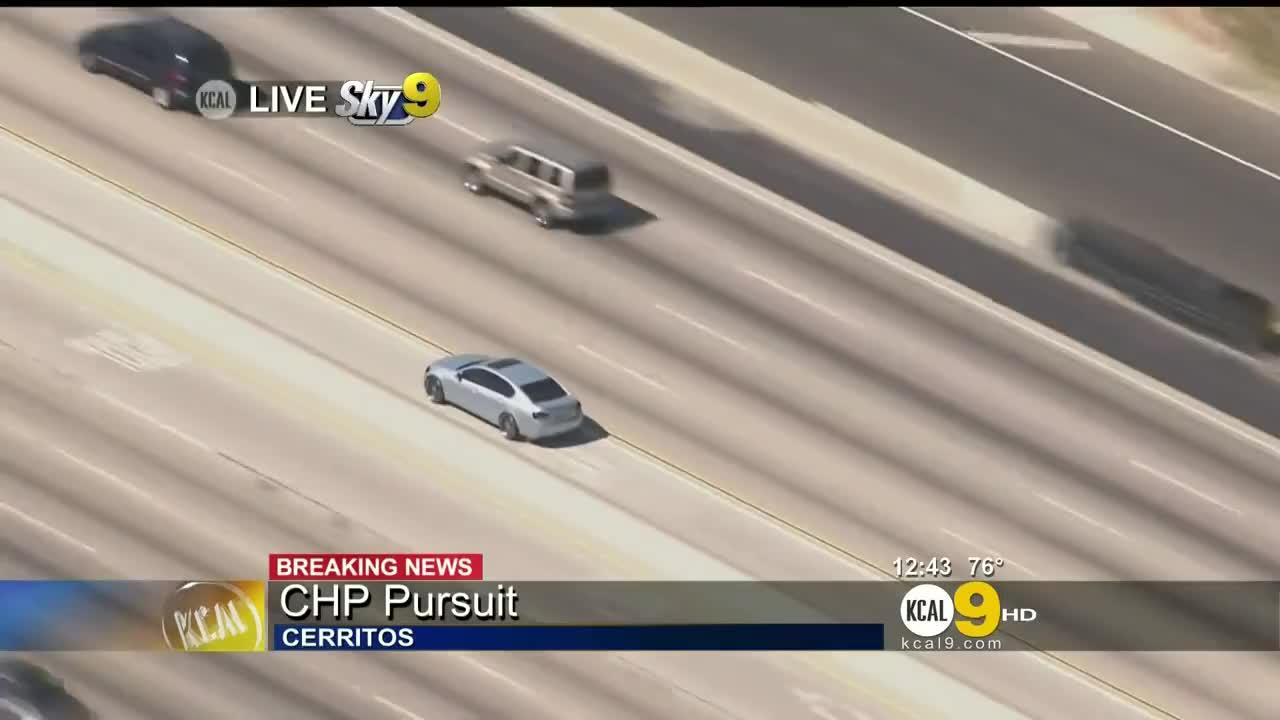

In [5]:
cv2_imshow(test_image)

In [6]:
#load the pre-trained cascade classifier.
car_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/vehicle_detection_haarcascades-master/cars.xml')

In [7]:
#Draw a rectangle around cars in the image
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
cars1 = car_cascade.detectMultiScale(gray_image,1.1,5,1,(150,100))

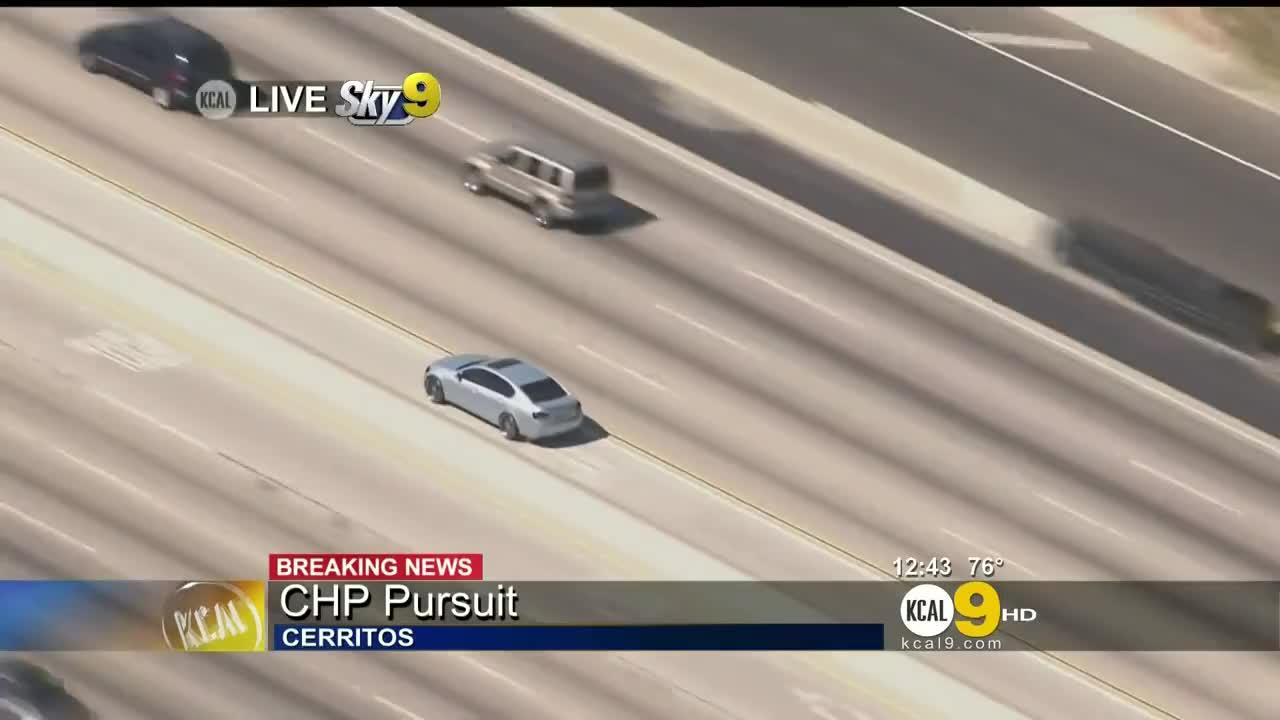

In [8]:
#test
for (x,y,w,h) in cars1:
  cv2.rectangle(test_image, (x,y), (x+w,y+h), (0,0,255), 3)
cv2_imshow(test_image)
#car will only be tracked in some frames

# Make the video and the CSV file

In [9]:
import numpy as np

In [10]:
#create the video file and video object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter('Video2.avi',fourcc,5,(1280,720))

In [11]:
# function to get the image path
def get_path(i):
  if i < 10:
    img_no = '0000' + str(i)
  elif i < 100:
    img_no = '000' + str(i)
  else:
    img_no = '00' + str(i)
  return '/content/drive/MyDrive/tracking-data/'+img_no+'.jpg' 

In [12]:
co_ordinates = []

 
for image in range(1,501):

  try:

    path = get_path(image)
    frame = cv2.imread(path,1)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    car = car_cascade.detectMultiScale(gray,1.1,5,1,(150,100))

    (x,y,h,w) = car[0] # first car spotted will usually be target car

    cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 3)
    video.write(frame)
    co_ordinates.append((image,x,y,w,h))

    print('Frame {} done'.format(image))
  except:
    pass

cv2.destroyAllWindows()
video.release()



Frame 2 done
Frame 3 done
Frame 5 done
Frame 6 done
Frame 7 done
Frame 8 done
Frame 10 done
Frame 11 done
Frame 15 done
Frame 16 done
Frame 20 done
Frame 21 done
Frame 22 done
Frame 24 done
Frame 25 done
Frame 26 done
Frame 27 done
Frame 31 done
Frame 32 done
Frame 33 done
Frame 34 done
Frame 36 done
Frame 42 done
Frame 48 done
Frame 49 done
Frame 51 done
Frame 52 done
Frame 54 done
Frame 55 done
Frame 56 done
Frame 57 done
Frame 58 done
Frame 60 done
Frame 62 done
Frame 64 done
Frame 65 done
Frame 66 done
Frame 67 done
Frame 68 done
Frame 69 done
Frame 70 done
Frame 71 done
Frame 72 done
Frame 73 done
Frame 74 done
Frame 75 done
Frame 76 done
Frame 77 done
Frame 78 done
Frame 79 done
Frame 80 done
Frame 81 done
Frame 82 done
Frame 86 done
Frame 87 done
Frame 88 done
Frame 89 done
Frame 90 done
Frame 91 done
Frame 92 done
Frame 93 done
Frame 95 done
Frame 96 done
Frame 97 done
Frame 98 done
Frame 99 done
Frame 100 done
Frame 101 done
Frame 103 done
Frame 104 done
Frame 105 done
Frame 1

In [13]:
len(co_ordinates) #could find car in only 233 frames

233

In [14]:
frame = []
x_coordinate = []
y_coordinate = []
height = []
width = []
for x in co_ordinates:
  frame.append(x[0])
  x_coordinate.append(x[1])
  y_coordinate.append(x[2])
  width.append(x[3])
  height.append(x[4])


In [15]:
import pandas as pd
car_position = pd.DataFrame({'Frame_no':frame,'x_coordinate':x_coordinate, 'y_coordinate':y_coordinate, 'width':width, 'height':height})

In [17]:
car_position.to_csv('car_position.csv', index=None)